In [1]:
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
pd.options.mode.chained_assignment = None

In [2]:
%matplotlib inline

In [3]:
train=pd.read_csv('kaggle/train.csv')
test = pd.read_csv('kaggle/test.csv')
submit=pd.read_csv('kaggle/sampleSubmission.csv')

In [4]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


In [7]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [9]:
#eliminate outliers by three times standard deviation
print("shape of the before outliers:",train.shape)
train=train[np.abs(train["count"]-train["count"].mean())<=(3*train["count"].std())]
print("shape of the after outliers:",train.shape)

shape of the before outliers: (10886, 12)
shape of the after outliers: (10739, 12)


In [10]:
#combine train and test for analysis and reset index
data=train.append(test)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

C:\Users\P2420\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [11]:
#create new columns for further analysis
data["date"]=data.datetime.apply(lambda x:x.split()[0])
data["hour"]=data.datetime.apply(lambda x:x.split()[1].split(":")[0]).astype("int")
data["year"]=data.datetime.apply(lambda x:x.split()[0].split("-")[0])
data["weekday"]=data.date.apply(lambda dateString:datetime.strptime(dateString,"%Y-%m-%d").weekday()) 
data["month"]=data.date.apply(lambda dateString:datetime.strptime(dateString,"%Y-%m-%d").month) 

C:\Users\P2420\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0.5, 0, 'windspeed'), Text(0.5, 1.0, 'distribution of windspeed')]

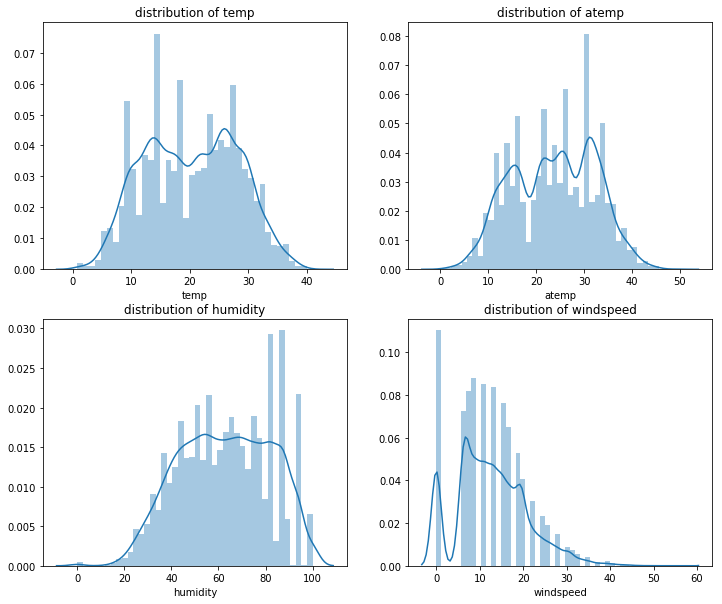

In [12]:
#graph features to see which may have bias
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,10)
sns.distplot(data["temp"],ax=axes[0][0])
sns.distplot(data["atemp"],ax=axes[0][1])
sns.distplot(data["humidity"],ax=axes[1][0])
sns.distplot(data["windspeed"],ax=axes[1][1])


axes[0][0].set(xlabel='temp',title="distribution of temp")
axes[0][1].set(xlabel='atemp',title="distribution of atemp")
axes[1][0].set(xlabel='humidity',title="distribution of humidity")
axes[1][1].set(xlabel='windspeed',title="distribution of windspeed")

#assume that data in windspeed include bias

In [13]:
#feature engineering
#according to the findings above, we should train the model by features which may influence winspeed to obtain data which may be less bias
dataWind0=data[data["windspeed"]==0]
dataWindNot0=data[data["windspeed"]!=0]
rfModel_wind=RandomForestRegressor(n_estimators=1000,random_state=42)
windColumns=["season","weather","humidity","month","temp","year","atemp"]
rfModel_wind.fit(dataWindNot0[windColumns],dataWindNot0["windspeed"])

wind0Values=rfModel_wind.predict(X=dataWind0[windColumns])
dataWind0.loc[:,"windspeed"]=wind0Values
data=dataWindNot0.append(dataWind0)
data.reset_index(inplace=True)
data.drop("index",inplace=True,axis=1)

C:\Users\P2420\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


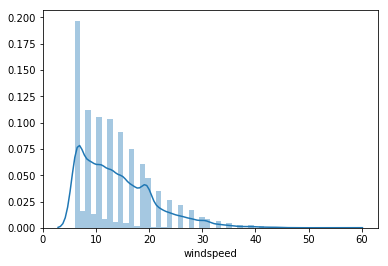

In [14]:
sns.distplot(data["windspeed"])

In [15]:
#split data for training, also split datetime column since the file we submit to kaggle requires it
dataTrain=data[pd.notnull(data['count'])].sort_values(by=["datetime"])
dataTest=data[-pd.notnull(data['count'])].sort_values(by=["datetime"])
datetimecol=dataTest["datetime"]
yLabels=dataTrain["count"]
yLabelsLog=np.log(yLabels)
#log is for normal distribution

In [16]:
dropFeatures=["casual","count","datetime","date","registered"]
dataTrain=dataTrain.drop(dropFeatures,axis=1)
dataTest=dataTest.drop(dropFeatures,axis=1)

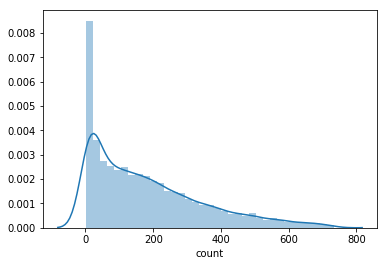

In [17]:
sns.distplot(yLabels)

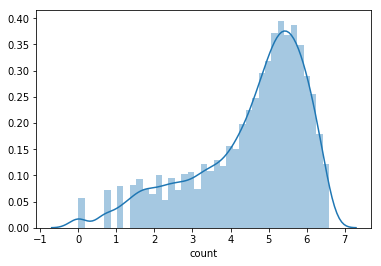

In [18]:
sns.distplot(yLabelsLog)

In [19]:
rfModel=RandomForestRegressor(n_estimators=1000,random_state=42)
rfModel.fit(dataTrain,yLabelsLog)
preds=rfModel.predict(X=dataTrain)

In [20]:
preds

array([2.98524532, 3.4456086 , 3.21858939, ..., 5.17071348, 4.93286002,
       4.54421879])

In [21]:
predsTest=rfModel.predict(X=dataTest)
submission=pd.DataFrame({
    "datetime":datetimecol,
    "count":[max(0,x)for x in np.exp(predsTest)]
})
submission.to_csv("bike_predictions_RF.csv",index=False)

In [22]:
#kaggle score 0.42945
submission

,datetime,count
9442,2011-01-20 00:00:00,10.837096
16365,2011-01-20 01:00:00,4.925602
16366,2011-01-20 02:00:00,2.880003
9443,2011-01-20 03:00:00,3.046886
9444,2011-01-20 04:00:00,2.567355
9445,2011-01-20 05:00:00,5.347720
9446,2011-01-20 06:00:00,34.918946
9447,2011-01-20 07:00:00,91.299298
9448,2011-01-20 08:00:00,207.101937
9449,2011-01-20 09:00:00,122.841555
